In [6]:
# A partir del startingPoint1.ipynb

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_completeness_v_measure, normalized_mutual_info_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist

In [3]:
df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis=1)

In [4]:
df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

In [5]:
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

pca = PCA(n_components=0.95)

pca.fit(df_num_scaled)

pca_features = pca.transform(df_num_scaled)

In [6]:
model = KMeans(n_clusters=3)
clusters = model.fit_predict(pca_features)

c:\Users\aluce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Exception in thread Thread-7:
Traceback (most recent call last):
  File "c:\Users\aluce\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\Users\aluce\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\aluce\anaconda3\lib\subprocess.py", line 1370, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\aluce\anaconda3\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\aluce\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
list index out of range
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aluce

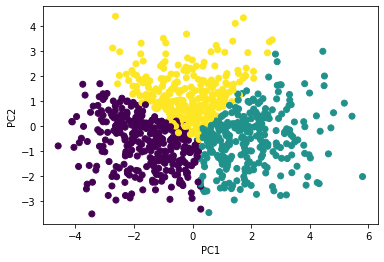

In [7]:
plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [30]:
silhouette_avg = silhouette_score(pca_features, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.127478036091558


Valors entre -1 i 1

In [31]:
inertia = model.inertia_
print("Inèrcia (WCSS):",inertia)

Inèrcia (WCSS): 6973.055010005648


Es busca minimitzar la mètrica de la inèrcia

In [32]:
bcss = pca_features.shape[0] * (pca_features.mean(axis=0)**2).sum() - inertia
print("BCSS:",bcss)

BCSS: -6973.055010005648


Es busca maximitzar la mètrica de BCSS

In [34]:
true_labels = df['']  # Falta nom de la columna
ari = adjusted_rand_score(true_labels, clusters)
print("Índex d'Adjustament Rand (ARI):", ari)

# Ens faltaria saber la columna on hem classificat nosaltres manualment les dades, així comprovar si ho fa correctament

KeyError: ''

Valors entre -1 i 1, volem aconseguir el valor més proper a 1

In [35]:
homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(true_labels, clusters)
print("Homogeneïtat:", homogeneity)
print("Completitud:",completeness)
print("V-Measure:", v_measure)

# Falta asignar true_labels, com en l'anterior

NameError: name 'true_labels' is not defined

In [36]:
nmi = normalized_mutual_info_score(true_labels, clusters)
print("Informació Mutua Normalitzada (NMI):",nmi)

# Falta asignar true_labels, com en l'anterior

NameError: name 'true_labels' is not defined

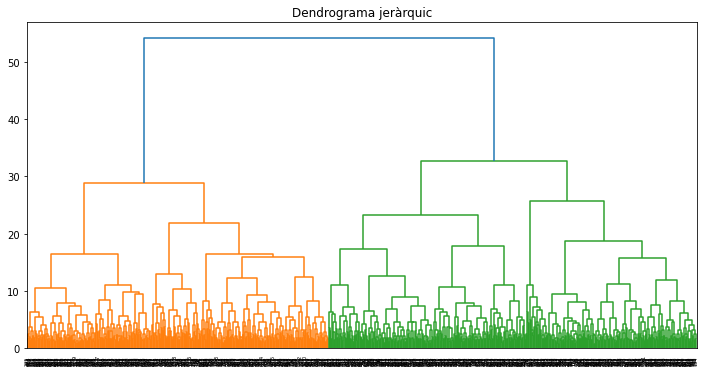

Correlació de Cophenetic: 0.3213676674313992


In [37]:
Z = linkage(pca_features, method='ward')
c, coph_dists = cophenet(Z, pdist(pca_features))

plt.figure(figsize=(12, 6))
plt.title('Dendrograma jeràrquic')
dendrogram(Z)
plt.show()

print("Correlació de Cophenetic:",c)

In [38]:
db_index = davies_bouldin_score(pca_features, clusters)
print("Índex Davies-Bouldin:",db_index)

Índex Davies-Bouldin: 2.095934651537393


Un valor baix en aquest index indica un millor qualitat dels clústers

In [39]:
ch_index = calinski_harabasz_score(pca_features, clusters)
print("Índex de Calinski-Harabasz:",ch_index)

Índex de Calinski-Harabasz: 161.07583709159272


Un valor alt en aquest index indica un millor qualitat dels clústers